# Bank Term Deposit Prediction Project 


# 1. Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 2. Load Dataset

In [3]:
df = pd.read_csv("bankmarketing.csv")

# 3. Data Cleaning & Inspection

In [12]:
print("Missing values per column:\n", df.isnull().sum())
print("\nSample data:\n", df.head())

Missing values per column:
 age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Sample data:
    age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome em

# 4. EDA (Exploratory Data Analysis)

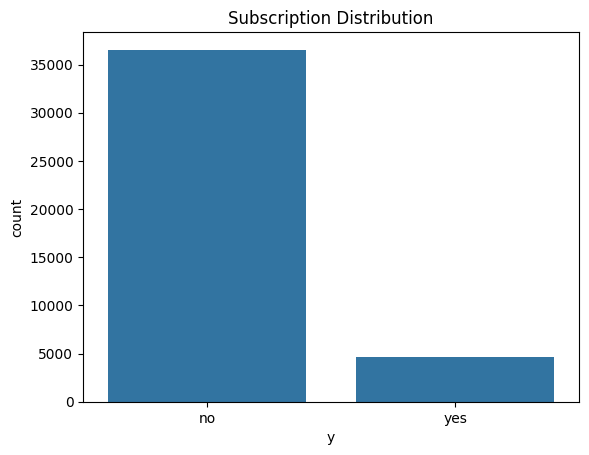

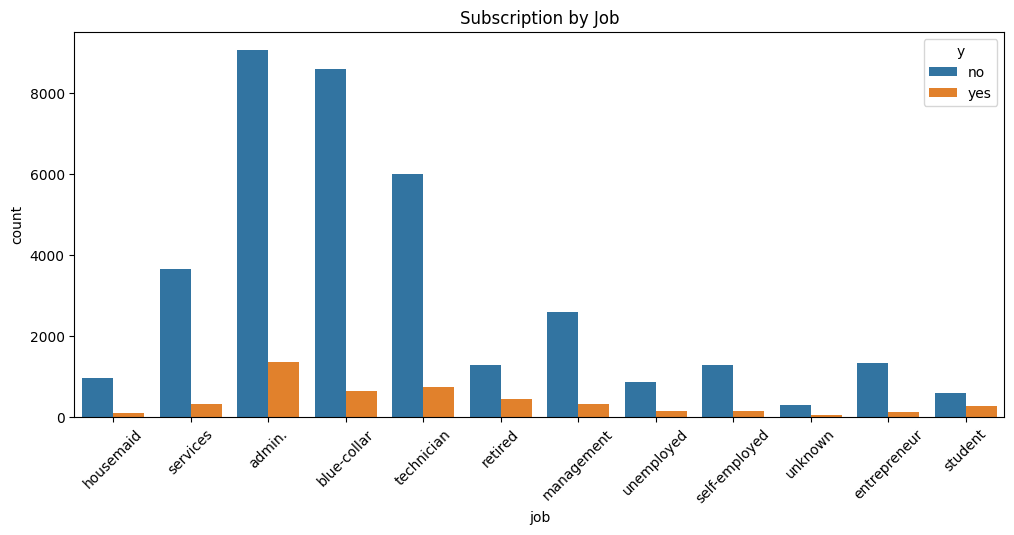

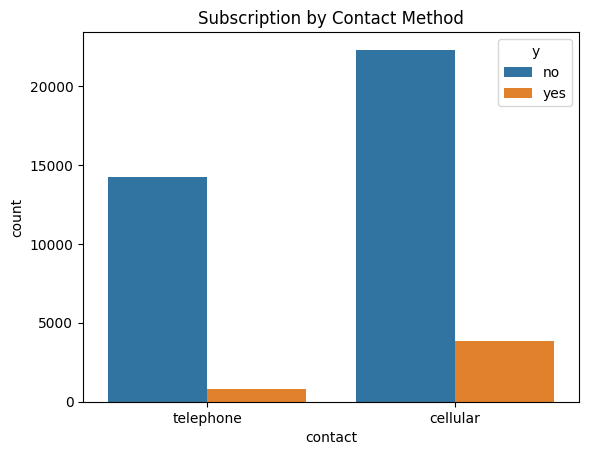

In [13]:
sns.countplot(data=df, x='y')
plt.title("Subscription Distribution")
plt.show()

plt.figure(figsize=(12,5))
sns.countplot(data=df, x='job', hue='y')
plt.title("Subscription by Job")
plt.xticks(rotation=45)
plt.show()

sns.countplot(data=df, x='contact', hue='y')
plt.title("Subscription by Contact Method")
plt.show()

# 5. Data Preprocessing

In [ ]:
df_model = df.copy()
df_model['y'] = df_model['y'].map({'yes': 1, 'no': 0})

# Label encode categorical columns
categorical_cols = df_model.select_dtypes(include='object').columns
le = LabelEncoder()
for col in categorical_cols:
    df_model[col] = le.fit_transform(df_model[col])

# Normalize numeric columns
numerical_cols = ['age', 'duration', 'campaign', 'pdays', 'previous',
                  'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
                  'euribor3m', 'nr.employed']
scaler = StandardScaler()
df_model[numerical_cols] = scaler.fit_transform(df_model[numerical_cols])

# 6. Train-Test Split

In [ ]:
X = df_model.drop('y', axis=1)
y = df_model['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 7. Train Models

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# 8. Evaluate Models

In [15]:
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"\n=== {name} ===")
    print("Confusion Matrix:\n", confusion_matrix(y_test, preds))
    print("Classification Report:\n", classification_report(y_test, preds))


=== Logistic Regression ===
Confusion Matrix:
 [[7147  163]
 [ 547  381]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95      7310
           1       0.70      0.41      0.52       928

    accuracy                           0.91      8238
   macro avg       0.81      0.69      0.74      8238
weighted avg       0.90      0.91      0.90      8238


=== Decision Tree ===
Confusion Matrix:
 [[6849  461]
 [ 399  529]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      7310
           1       0.53      0.57      0.55       928

    accuracy                           0.90      8238
   macro avg       0.74      0.75      0.75      8238
weighted avg       0.90      0.90      0.90      8238


=== Random Forest ===
Confusion Matrix:
 [[7086  224]
 [ 435  493]]
Classification Report:
               precision    recall  f1-score   support

      

# 9. Conclusion

In [14]:
print("""
Conclusion:
- Clients contacted via 'cellular' had higher subscription rates.
- Job and education level influence conversion.
- Logistic Regression had high precision, but Random Forest gave the best balance (F1-score).
- The model can assist marketing teams in targeting the right audience and optimizing outreach strategy.
""")



Conclusion:
- Clients contacted via 'cellular' had higher subscription rates.
- Job and education level influence conversion.
- Logistic Regression had high precision, but Random Forest gave the best balance (F1-score).
- The model can assist marketing teams in targeting the right audience and optimizing outreach strategy.

